<function matplotlib.pyplot.show(close=None, block=None)>

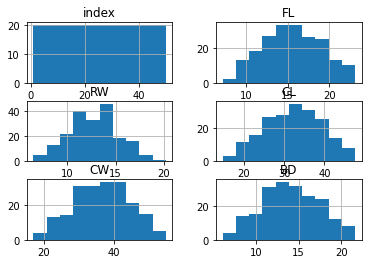

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'data_crab.csv'
data = pd.read_csv(url)
data.hist()
plt.show

<Axes: >

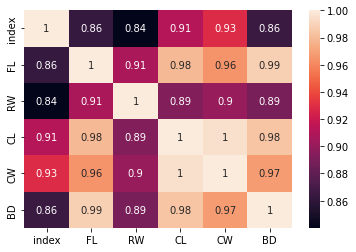

In [13]:
correlationdata = data.corr()
import seaborn as sns
sns.heatmap(correlationdata, annot = True)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='BD', ylabel='FL'>

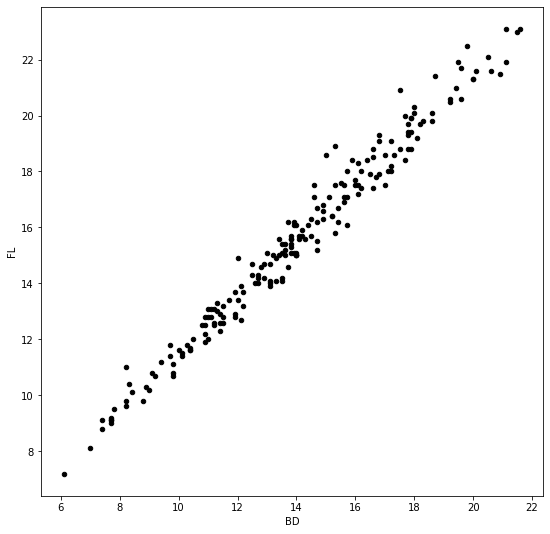

In [22]:
data.plot(kind = 'scatter', x = 'BD', y = 'FL', figsize=(9,9), color = 'black')

Intercept của mô hình:  1.4406342304011854
Coeffient của mô hình:  [1.00797304]
Độ chính xác của mô hình:  0.9754074794865865


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


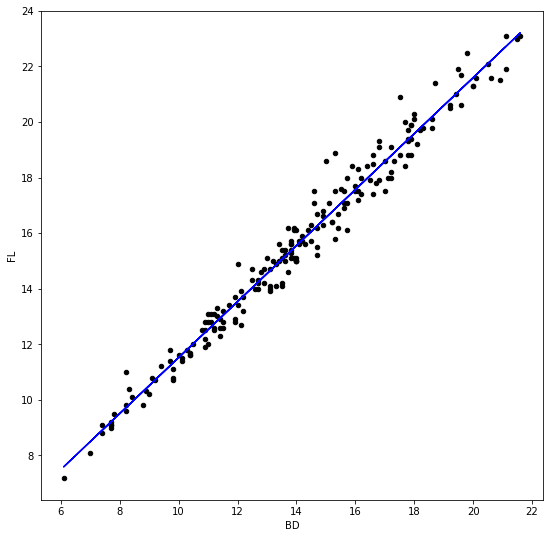

In [23]:
#Mô hình bậc 1
from sklearn import linear_model
modeldata = linear_model.LinearRegression()
X = pd.DataFrame(data['BD'])
modeldata.fit(X, y = data['FL'])
print('Intercept của mô hình: ', modeldata.intercept_)
print('Coeffient của mô hình: ', modeldata.coef_)
print('Độ chính xác của mô hình: ', 
      modeldata.score(X,y = data['FL']))
data.plot(kind = 'scatter', x = 'BD', y = 'FL', figsize=(9,9), 
                 color = 'black')
y_pred = modeldata.predict(X)
plt.plot(X,y_pred, color = 'blue')

Intercept của mô hình:  10.368399992399107
Coeffient của mô hình:  [-4.47020869e-02 -2.33267131e-01 -4.86420146e-01  2.64857288e-01
 -5.63523675e-02  6.48832384e-03 -4.40631425e-04  1.76877711e-05
 -3.88930150e-07  3.61601155e-09]
Độ chính xác của mô hình:  0.9760780207356782


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


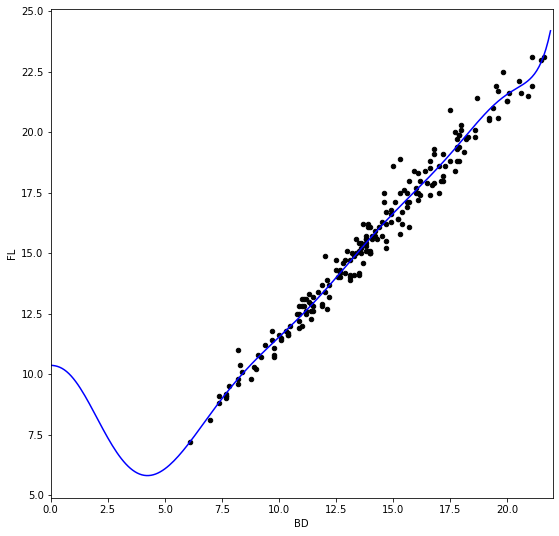

In [26]:
#Mô hình bậc 10
from sklearn import linear_model
modelHousing10 = linear_model.LinearRegression()
X = pd.DataFrame([data['BD'], data['BD']**2, data['BD']**3, data['BD']**4,
                  data['BD']**5, data['BD']**6,data['BD']**7, data['BD']**8,
                  data['BD']**9, data['BD']**10]).T
modelHousing10.fit(X, y = data['FL'])
print('Intercept của mô hình: ', modelHousing10.intercept_)
print('Coeffient của mô hình: ', modelHousing10.coef_)
print('Độ chính xác của mô hình: ', 
      modelHousing10.score(X,y = data['FL']))

import numpy as np
range = np.arange(0,22,0.1)
data.plot(kind = 'scatter', x = 'BD', y = 'FL', figsize=(9,9),
                 color = 'black', xlim=(0,22))
predictor = pd.DataFrame([range, range**2, range**3, range**4, range**5,
                          range**6, range**7, range**8, range**9, range**10]).T
y_pred = modelHousing10.predict(X = predictor)
plt.plot(range,y_pred, color = 'blue')